## IMPORTING IMPORTANT LIBRARIES

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

### READING THE CSV FILE

In [33]:
data=pd.read_csv('income.csv')
df=data.copy()

In [50]:
data.head(15)

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


### CREATING SCATTER PLOT

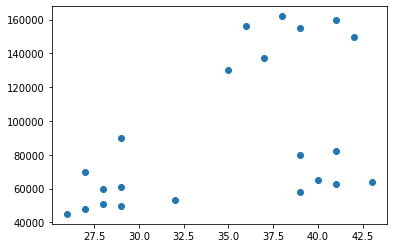

In [35]:
plt.scatter(data.Age,data['Income($)'])

### IMPLEMENTATION OF KMEANS 

In [36]:
kmean=KMeans(n_clusters=3)


In [37]:
y_predicted=kmean.fit_predict(data[['Age','Income($)']])

In [38]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [39]:
data['cluster']=y_predicted

In [40]:
data1=data[data.cluster==0]
data2=data[data.cluster==1]
data3=data[data.cluster==2]


### PLOTTING THE SCATTER PLOT

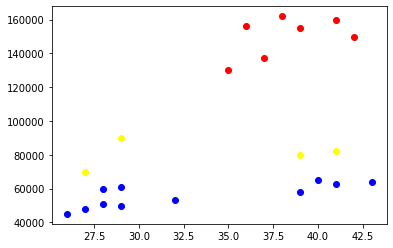

In [63]:
plt.scatter(data1['Age'],data1['Income($)'],color='blue')
plt.scatter(data2['Age'],data2['Income($)'],color='red')
plt.scatter(data3['Age'],data3['Income($)'],color='yellow')

# SOME MISTAKE IS CLEARLY VISIBLE IN OUR CLUSTERING ALGORITHM AND THIS IS BECAUSE SCALING

### USING MIN MAX SCALER 

In [45]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df['Income($)']=mm.fit_transform(df[['Income($)']])

In [47]:
df['Age']=mm.fit_transform(df[['Age']])
df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


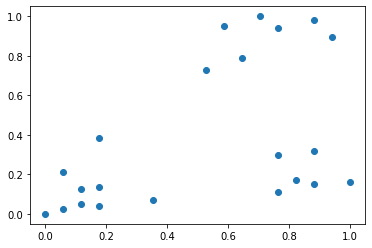

In [51]:
plt.scatter(df['Age'],df['Income($)'])

In [53]:
km2=KMeans(n_clusters=3)
y_pred2=km2.fit_predict(df[['Age','Income($)']])

In [54]:
df['cluster']=y_pred2
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


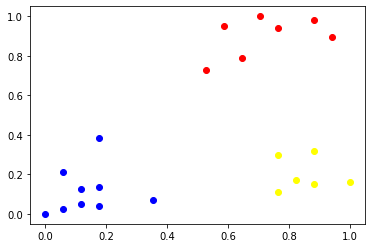

In [55]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color='blue')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='yellow')
# NOW IT IS GIVING THE BEST RESULTS OF CLUSTERING 

### CREATING ELBOW CURVE

In [60]:
k_values=np.arange(1,10)
sse=[]
for k in k_values:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse




[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.27558255687229766,
 0.21055478995472493,
 0.184278684552248,
 0.14090581089405507,
 0.11490780678851839]

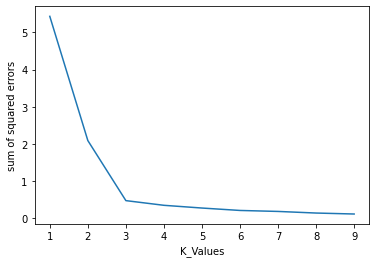

In [62]:
plt.xlabel('K_Values')
plt.ylabel('sum of squared errors')
plt.plot(k_values,sse)